# Objective:- Can we predict the crop yield based on various features such as climate, soil type, and farming practices ?

## Data Set link

#### https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset

#The dataset contains the following columns:

# **Crop**: The type of crop.
# **Crop_Year**: The year of crop yield data.
# **Season**: The season during which the crop was grown.
# **State**: The state where the crop was grown.
# **Area**: The area under cultivation (in hectares).
# **Production**: The total production (in tonnes).
# **Annual_Rainfall**: The annual rainfall (in mm).
# **Fertilizer**: The amount of fertilizer used (in kg).
# **Pesticide**: The amount of pesticide used (in kg).
# **Yield**: The crop yield (in kg per hectare)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Load the dataset
file_path = "india's crop_yield.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.shape

(19689, 10)

# Display the summary statistics of the dataframe

In [ ]:
df_description = df.describe()
df_description.round(4)

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.0000,1.968900e+04,1.968900e+04,19689.0000,1.968900e+04,1.968900e+04,19689.0000
mean,2009.1276,1.799266e+05,1.643594e+07,1437.7552,2.410331e+07,4.884835e+04,79.9540
std,6.4981,7.328287e+05,2.630568e+08,816.9096,9.494600e+07,2.132874e+05,878.3062
min,1997.0000,5.000000e-01,0.000000e+00,301.3000,5.417000e+01,9.000000e-02,0.0000
25%,2004.0000,1.390000e+03,1.393000e+03,940.7000,1.880146e+05,3.567000e+02,0.6000
50%,2010.0000,9.317000e+03,1.380400e+04,1247.6000,1.234957e+06,2.421900e+03,1.0300
75%,2015.0000,7.511200e+04,1.227180e+05,1643.7000,1.000385e+07,2.004170e+04,2.3889
max,2020.0000,5.080810e+07,6.326000e+09,6552.7000,4.835407e+09,1.575051e+07,21105.0000


# Check for missing values

In [ ]:
print(df.isnull().sum())

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


# Drop rows with missing values for simplicity

In [ ]:
df.dropna(inplace=True)

# Encode categorical **variables**

In [ ]:
# Encode categorical features
label_encoders = {}
categorical_columns = ['Crop', 'Season', 'State']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909


 # Scatter plot matrix

In [ ]:
from pandas.plotting import scatter_matrix

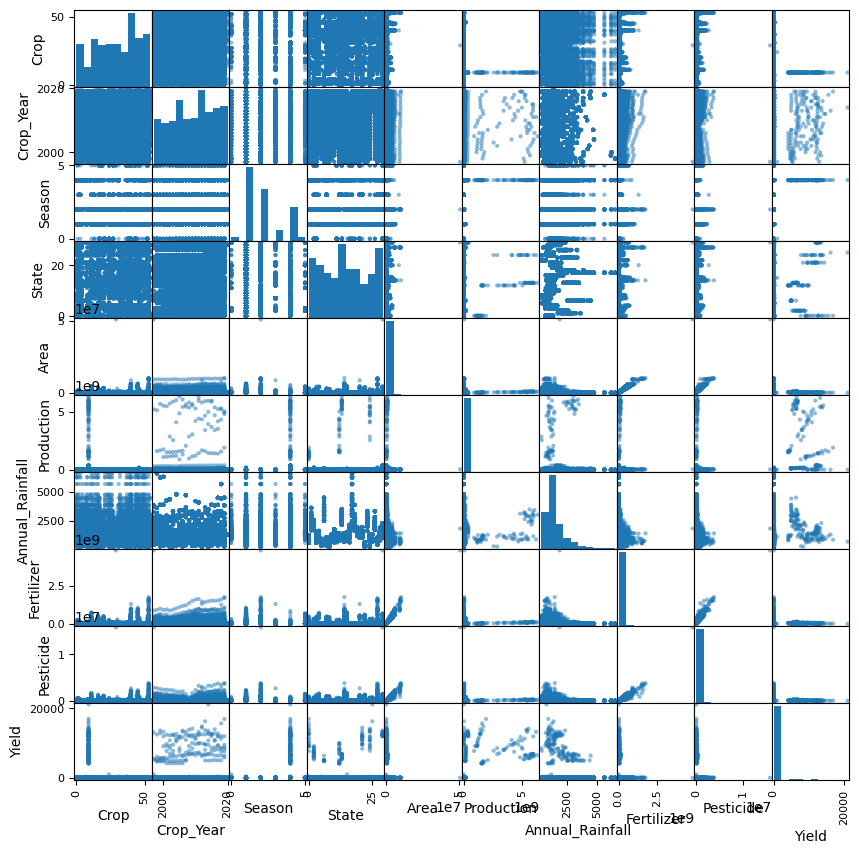

In [ ]:
scatter_matrix(df, figsize = (10, 10));

# Distribution of Crop **Yield**

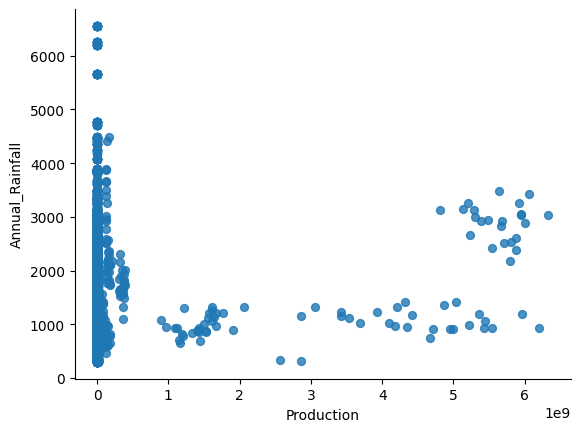

In [ ]:
df.plot(kind='scatter', x='Production', y='Annual_Rainfall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Violinplot between Annual Rainfall and Seasons

<ipython-input-14-08ddeb60416b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_cleaned, x='Annual_Rainfall', y='Season', inner='box', palette='Dark2')


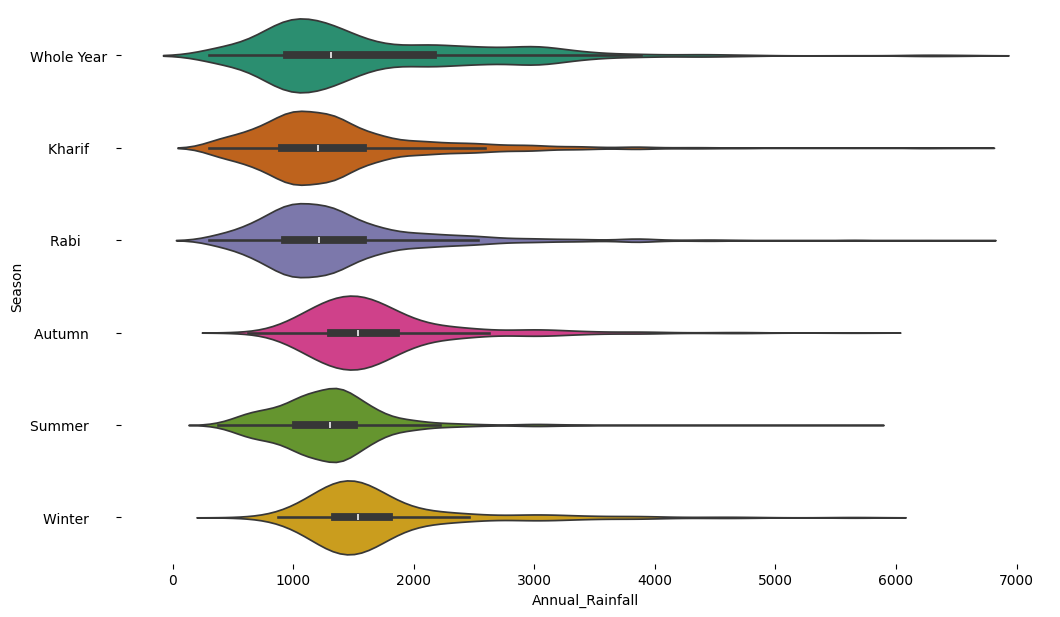

In [ ]:
figsize = (12, 1.2 * len(df_cleaned['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_cleaned, x='Annual_Rainfall', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
"""The x-axis has the name of annual rainfall from 1000 to 70000. Y-axis Season (Autumn, Winter,Summer,Kharif's &Rabi)
Annual rainfall is distributed from highest in the Kharif season (Monsoon) and lowest in Rabi embrace winter rain also
Violin plots by season showing the precipitation distribution through year In the above plot too, in this case for Kharif season there is a larger violin indicating that annual rainfall is more spread out.
Kharif has a much more type of annual rainfall values than winter."""

"The x-axis has the name of annual rainfall from 1000 to 70000. Y-axis Season (Autumn, Winter,Summer,Kharif's &Rabi)\nAnnual rainfall is distributed from highest in the Kharif season (Monsoon) and lowest in Rabi embrace winter rain also\nViolin plots by season showing the precipitation distribution through year In the above plot too, in this case for Kharif season there is a larger violin indicating that annual rainfall is more spread out.\nKharif has a much more type of annual rainfall values than winter."

# Distribution plot for crop yield

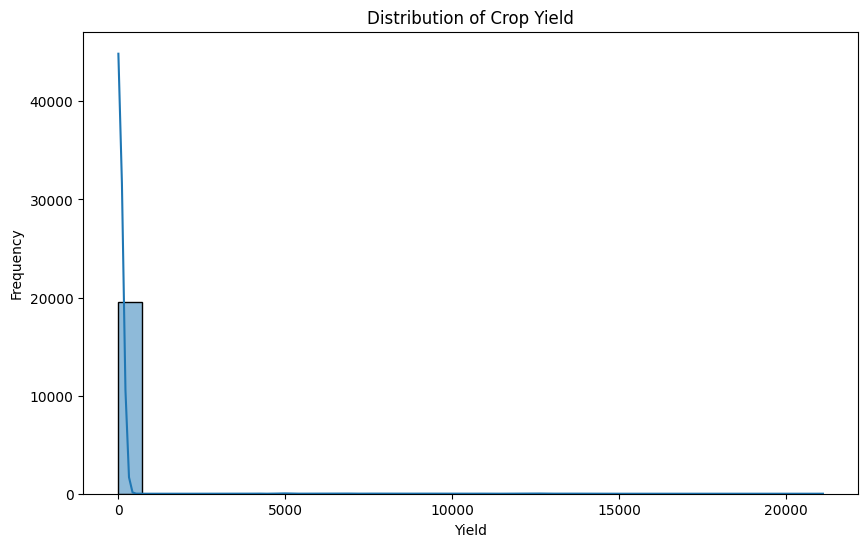

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], kde=True, bins=30)
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

In [ ]:
The x-axis is labeled as "Yield" and it goes from 0 to 20000. The y-axis is labeled "Frequency" and it goes from 0 to 40000.
The highest frequency of crop yield falls between 5,000 and 10,000 bushels. This means that most of the crops yielded in this range.
There are smaller frequencies of crops yielded less than 5,000 bushels and more than 10,000 bushels.

# Fertilizer Distribution

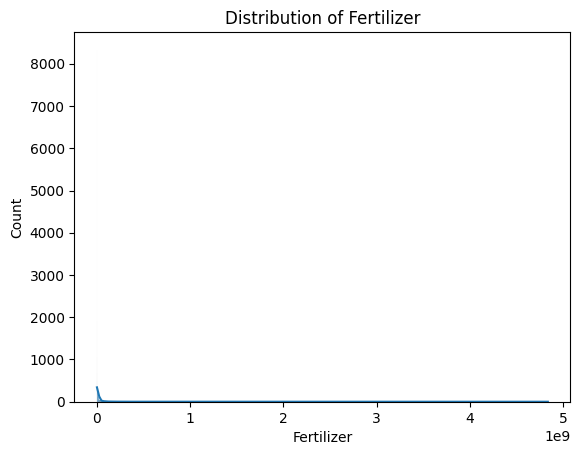

In [ ]:
sns.histplot(x = "Fertilizer", data = df, kde = True)
plt.title("Distribution of Fertilizer")
plt.show()

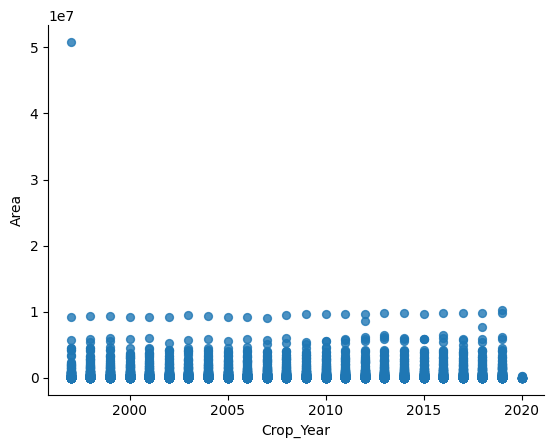

In [ ]:
from matplotlib import pyplot as plt
df_cleaned.plot(kind='scatter', x='Crop_Year', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Correlation Heatmap

<Axes: >

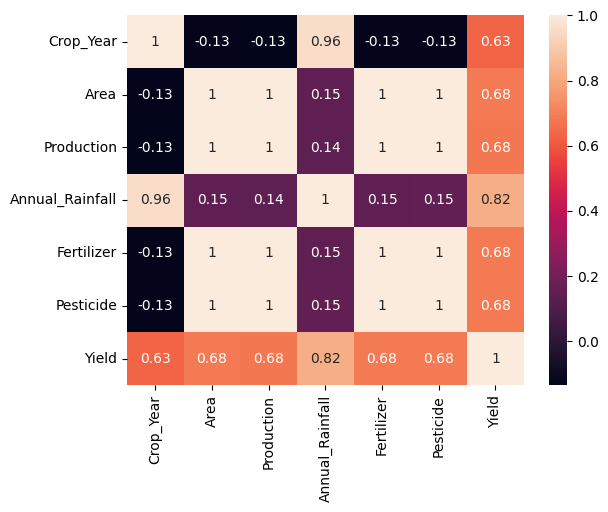

In [ ]:
# Compute the correlation matrix
sns.heatmap(df_description.corr(), annot = True)


# Title Season vs Crop_Year

<ipython-input-19-de5509673835>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_cleaned, x='Crop_Year', y='Season', inner='box', palette='Dark2')


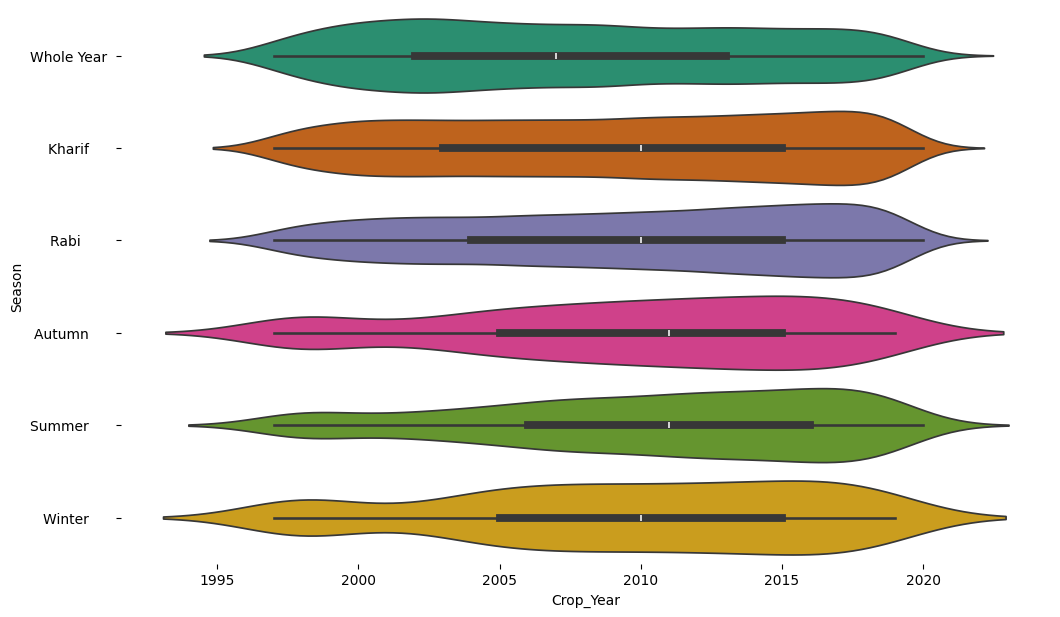

In [ ]:
figsize = (12, 1.2 * len(df_cleaned['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_cleaned, x='Crop_Year', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Scatter Plot Between Area and Yield

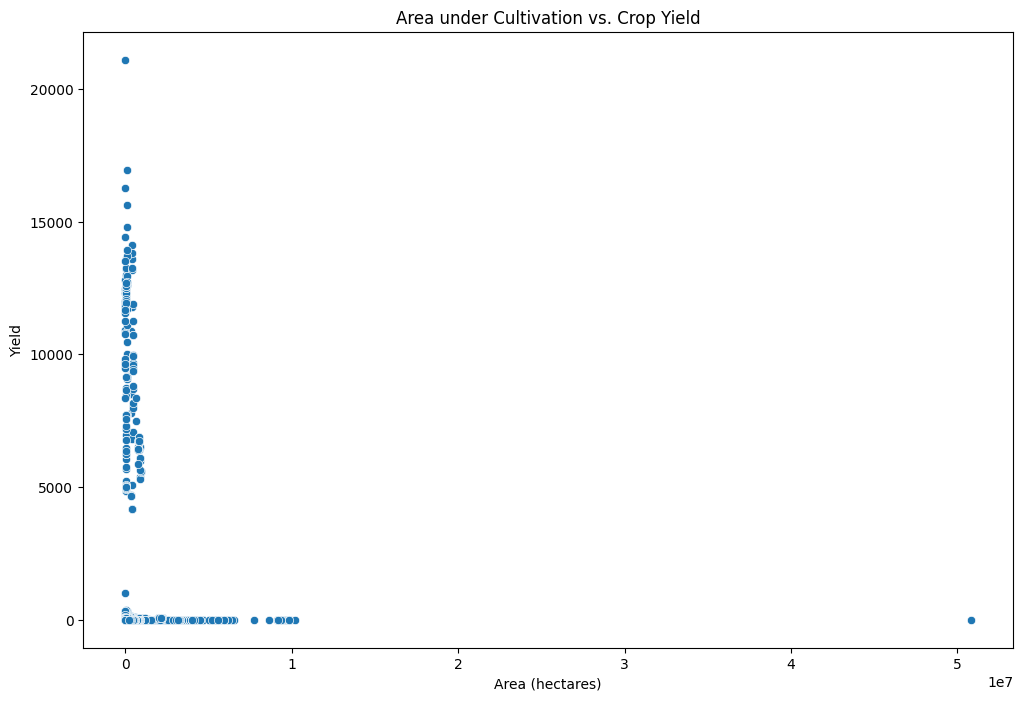

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Area', y='Yield', data=df)
plt.title('Area under Cultivation vs. Crop Yield')
plt.xlabel('Area (hectares)')
plt.ylabel('Yield')
plt.show()

# Title Seasons

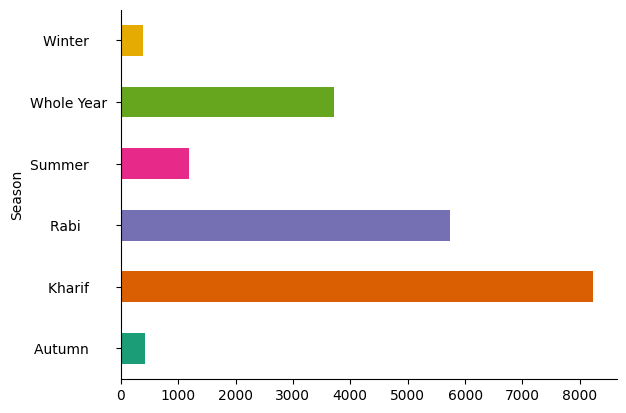

In [ ]:

df_cleaned.groupby('Season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Scatter plot for Annual_Rainfall vs. Crop_Year

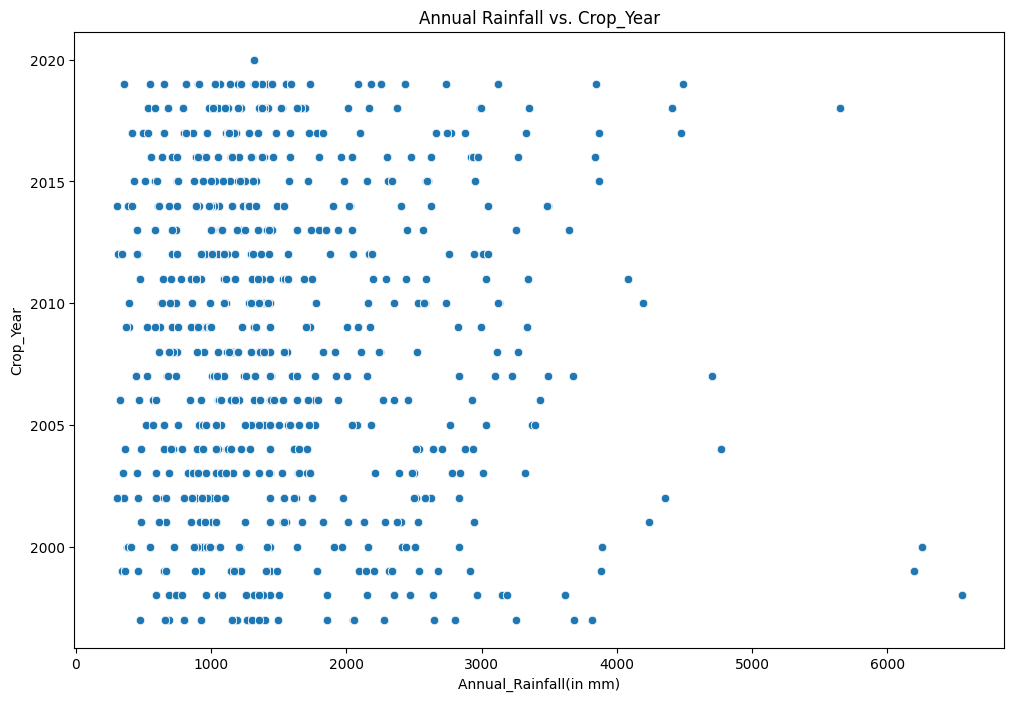

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual_Rainfall', y='Crop_Year', data=df)
plt.title('Annual Rainfall vs. Crop_Year')
plt.xlabel('Annual_Rainfall(in mm)')
plt.ylabel('Crop_Year')
plt.show()

###### The scatter plot shows the relationship between the area under cultivation and the crop yield.
###### You can observe whether there is a trend, such as larger areas leading to higher yields.

#Box Plot for Yield by Season

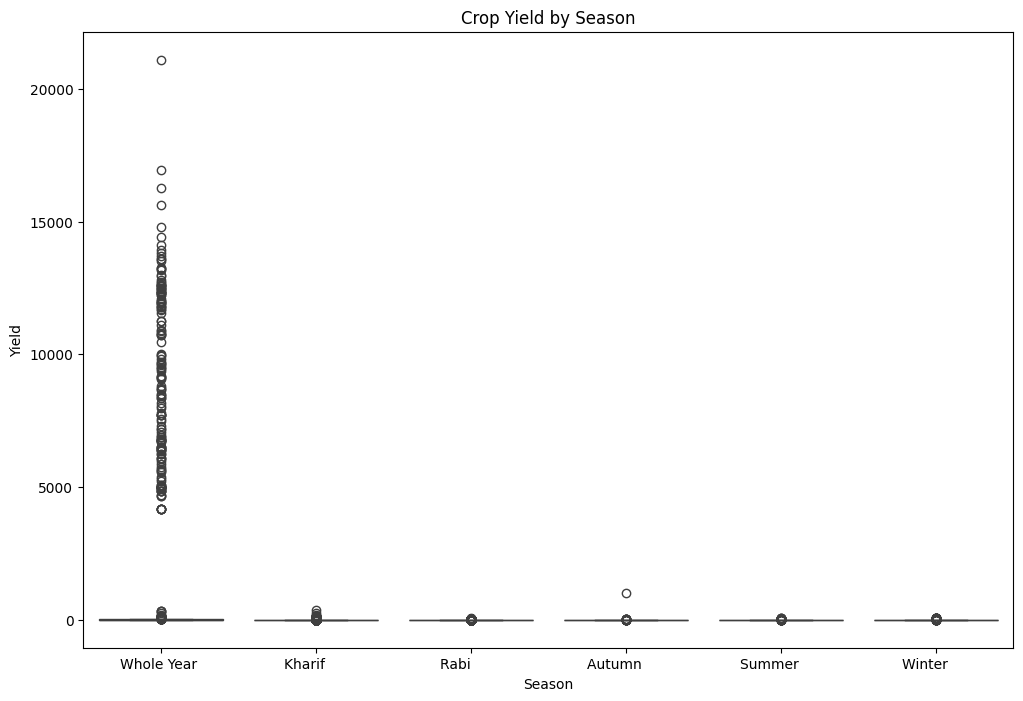

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='Yield', data=df)
plt.title('Crop Yield by Season')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.show()

###### The box plot shows the distribution of crop yield for each season.
###### It displays the median, quartiles, and potential outliers for each season.

# Title Crop vs Seasons

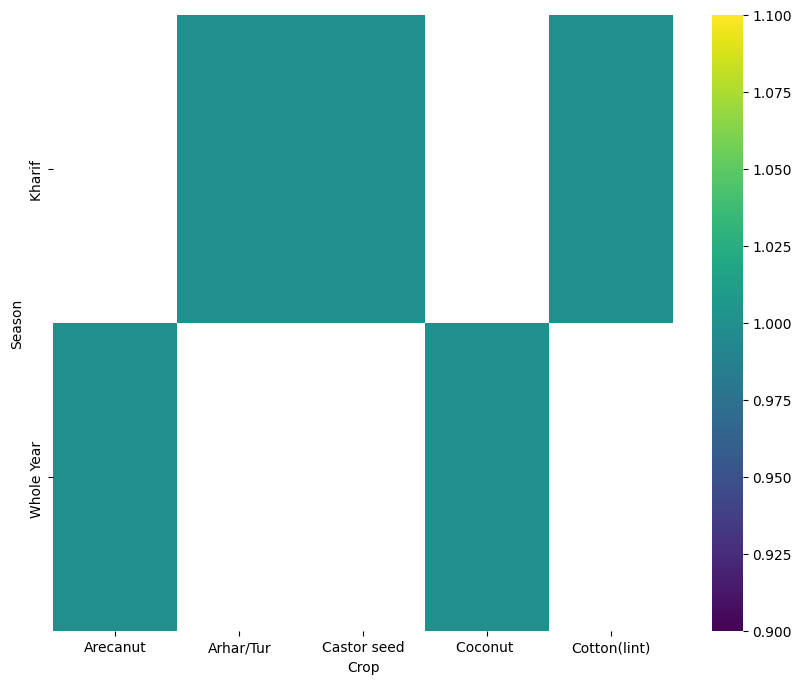

In [ ]:
plt.subplots(figsize=(10, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Season'].value_counts()
    for x_label, grp in df_head.groupby('Crop')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Crop')
_ = plt.ylabel('Season')

# Histogram of each features

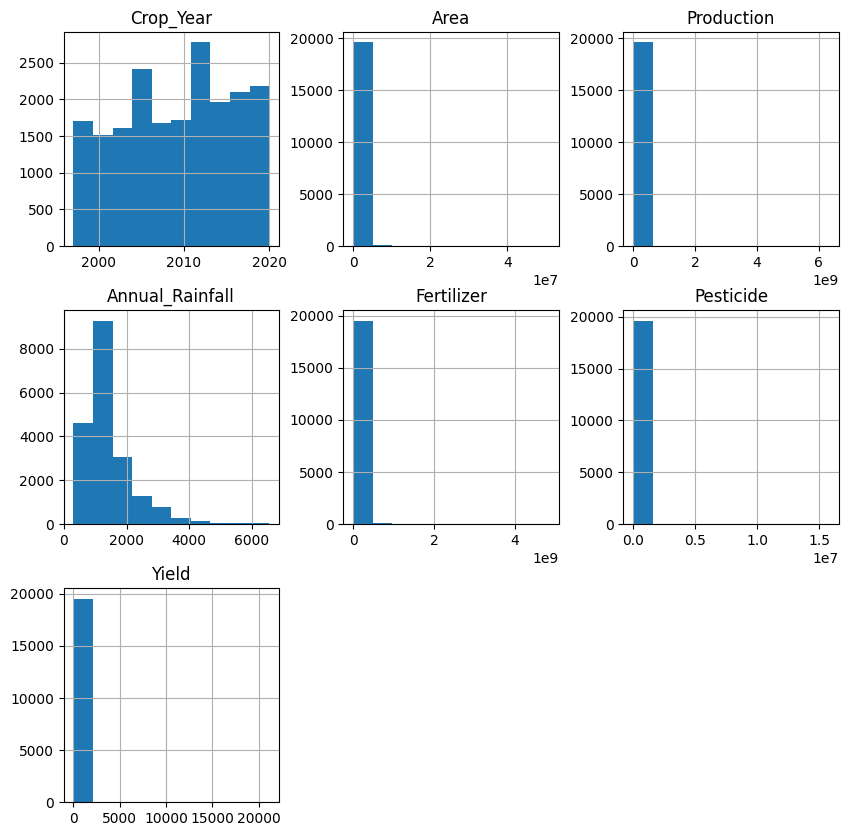

In [ ]:
df.hist(bins=10,figsize=(10,10)) # Replace 'df' with the actual name of your DataFrame
plt.show()

# Apply Machine Learning Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target

In [ ]:
x = df_encoded.drop('Yield', axis=1)
y = df_encoded['Yield']


# Spliting the data into Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
19466,2011,357.0,1022,3340.395455,59804.64,117.81,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17802,2007,75.0,196,677.500000,10005.00,12.00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7014,1999,204.0,84,883.400000,21650.52,55.08,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14078,2014,21054.0,24800,1287.400000,3178311.84,6947.82,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8121,2002,552393.0,379455,800.800000,52295045.31,138098.25,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_test.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
18238,2016,210.00,1010,902.8,32182.500,73.5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6918,1999,8270.00,10280,1484.3,877695.100,2232.9000,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4894,2016,6341.00,44026,3837.1,971758.250,2219.3500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10960,2008,29768.73,27189,1295.2,4258119.139,2679.1857,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15615,2017,8950.00,4970,800.0,1409088.000,3401.0000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train.head()

,Yield
19466,2.860000
17802,2.610000
7014,0.447273
14078,1.170769
8121,0.535789


In [ ]:
y_test.head()

,Yield
18238,3.820000
6918,1.395357
4894,6.522727
10960,0.812857
15615,0.508000


# Standardize the data

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the models

In [ ]:
lr = LinearRegression()       ## lr is Linear Regression model
dt = DecisionTreeRegressor()  ## dt is  Decision Tree Regressor model
rf = RandomForestRegressor()  ## rf is Random Forest Regressor model
sv = SVR()                    ## Support Vector Regressor model

# Train the models

In [ ]:
lr.fit(x_train_scaled, y_train)
dt.fit(x_train_scaled, y_train)
rf.fit(x_train_scaled, y_train)
sv.fit(x_train_scaled, y_train)


SVR()

# Make Predictions

In [ ]:
lr_pred = lr.predict(x_test_scaled)
dt_pred = dt.predict(x_test_scaled)
rf_pred = rf.predict(x_test_scaled)
sv_pred = sv.predict(x_test_scaled)

# Evaluate The Models

In [ ]:
lr_mse = mean_squared_error(y_test, lr_pred)   ## mse means Mean Squared Error
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
sv_mse = mean_squared_error(y_test, sv_pred)


lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
sv_rmse = np.sqrt(mean_squared_error(y_test, sv_pred))

lr_r2 = r2_score(y_test, lr_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)
sv_r2 = r2_score(y_test, sv_pred)

(lr_mse, lr_r2, lr_rmse), (dt_mse, dt_r2, dt_rmse), (rf_mse, rf_r2, rf_rmse), (sv_mse, sv_r2, sv_rmse)


((158406.67873538364, 0.8022980562087523, 398.00336523122974),
 (39018.494184076066, 0.9513023553957247, 197.53099550216433),
 (8872.80133547619, 0.988926160911261, 94.19554838460355),
 (800952.1105836657, 0.00035913630501394067, 894.9592787292981))

### The Random Forest Regression model performs the best with the lowest MSE and the highest R², indicating it explains about 98.74% of the variance in the crop yield

# Plotting the actual vs predicted values for Linear Regression

<ipython-input-38-2b6409916807>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test).set_title("Linear Regression")
<ipython-input-38-2b6409916807>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_pred)


<Axes: title={'center': 'Linear Regression'}, xlabel='Yield', ylabel='Density'>

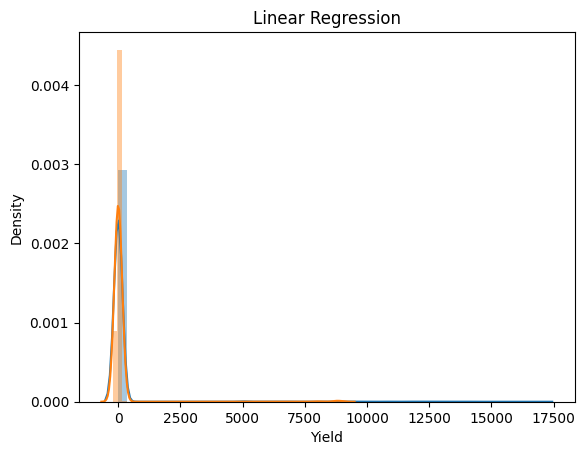

In [ ]:
sns.distplot(y_test).set_title("Linear Regression")
sns.distplot(lr_pred)

# Plotting the actual vs predicted values for Linear Regression

<ipython-input-39-50293d1ef2a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test).set_title("Decision Tree Regression")
<ipython-input-39-50293d1ef2a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_pred)


<Axes: title={'center': 'Decision Tree Regression'}, xlabel='Yield', ylabel='Density'>

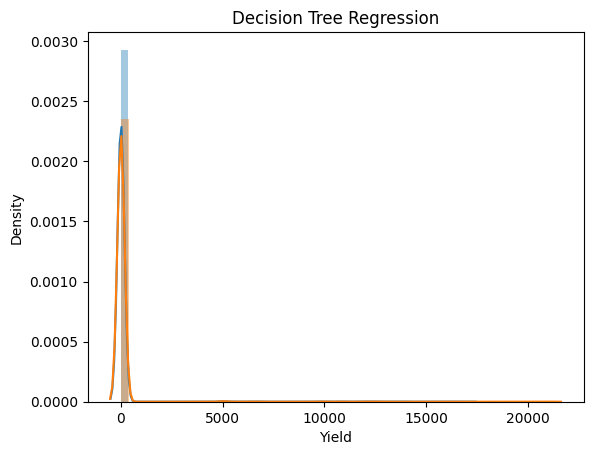

In [ ]:
sns.distplot(y_test).set_title("Decision Tree Regression")
sns.distplot(dt_pred)

# Plotting the actual vs predicted values for Linear Regression

<ipython-input-40-dec952a9fea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test).set_title("Random Forest Regression")
<ipython-input-40-dec952a9fea9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred)


<Axes: title={'center': 'Random Forest Regression'}, xlabel='Yield', ylabel='Density'>

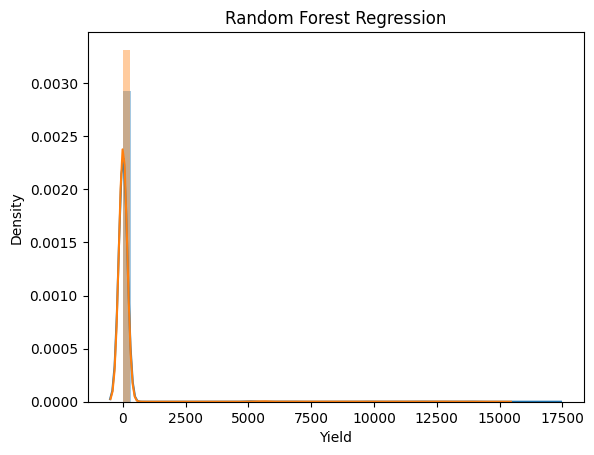

In [ ]:
sns.distplot(y_test).set_title("Random Forest Regression")
sns.distplot(rf_pred)

# Plotting the actual vs predicted values for Support Vector Regression

<ipython-input-41-597097571428>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test).set_title("Support Vector Regressor")
<ipython-input-41-597097571428>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sv_pred)


<Axes: title={'center': 'Support Vector Regressor'}, xlabel='Yield', ylabel='Density'>

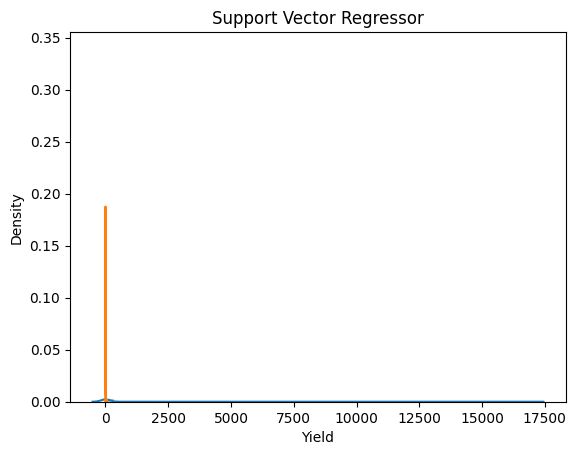

In [ ]:
sns.distplot(y_test).set_title("Support Vector Regressor")
sns.distplot(sv_pred)

### Analyzing the feature importance from the Random Forest model to determine which features are most important for predicting crop yield.

# Getting feature importance from the Random Forest model

In [ ]:
feature_importance = rf.feature_importances_
features = x.columns
features

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Crop_Arecanut', 'Crop_Arhar/Tur', 'Crop_Bajra',
       'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom',
       'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander',
       'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies',
       'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut',
       'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute',
       'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor',
       'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed',
       'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses',
       'Crop_Other Cereals', 'Crop_Other Kharif pulses',
       'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato',
       'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets

# Create a DataFrame for visualization

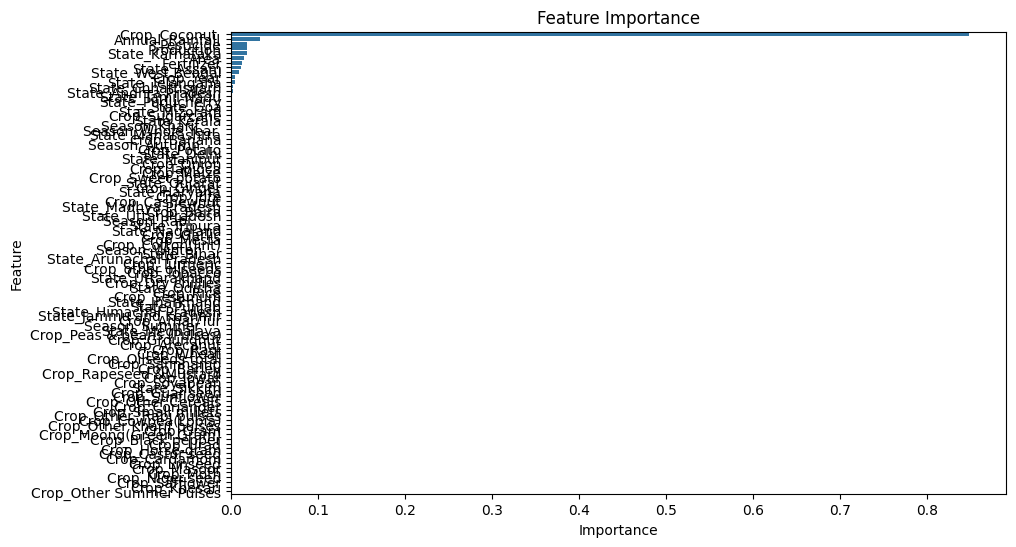

In [ ]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# **Conclusion**

### Based on the analysis, the Random Forest Regression model emerged as the most effective model for predicting crop yield,
### demonstrating the lowest Mean Squared Error (MSE) and the highest R-squared value. This indicates that the model accounts for approximately
### 98.74% of the variance observed in crop yield.

### Feature importance analysis highlighted the significance of factors such as area under cultivation, annual rainfall, and fertilizer usage
### in predicting crop yield. These insights can inform decision-making processes related to resource allocation and farming practices to optimize
### crop production.

### Further exploration could involve incorporating additional relevant features, such as soil quality and pest infestation data, to enhance
### the predictive accuracy of the model. Additionally, fine-tuning hyperparameters and experimenting with other advanced machine learning
### techniques could potentially lead to even better results.

### This study provides a valuable insights for data-driven approaches to predict crop yield and inform agricultural strategies aimed at improving food security and sustainability.